# aiReview

aiReview is an artificial intelligence-based system that creates a reviewer (in the form of an HTML file) from handwritten lecture notes. It uses optical character recognition (OCR) in converting an image of handwritten text into a machine-readable text file. Unlike other OCR software, it also features an annotation-conversion system that converts underlined words in the input with blanks and encircled words into bolded words.

This project is developed by: 

- A.V. Cayetano (THX)
- J. M. Choa (THX)
- H. A. Macalisang (THU)
- R. J. Portuguez (THW)

Thematic inspiration:
SDG 4 – Quality Education.

## Import packages

In [67]:
import numpy as np
import pandas as pd
import scipy
import cv2
from matplotlib import pyplot as plt
import ipynb.fs.defs.utils as utils
from PIL import Image
from IPython.display import display
from scipy.ndimage import interpolation

## Methodology

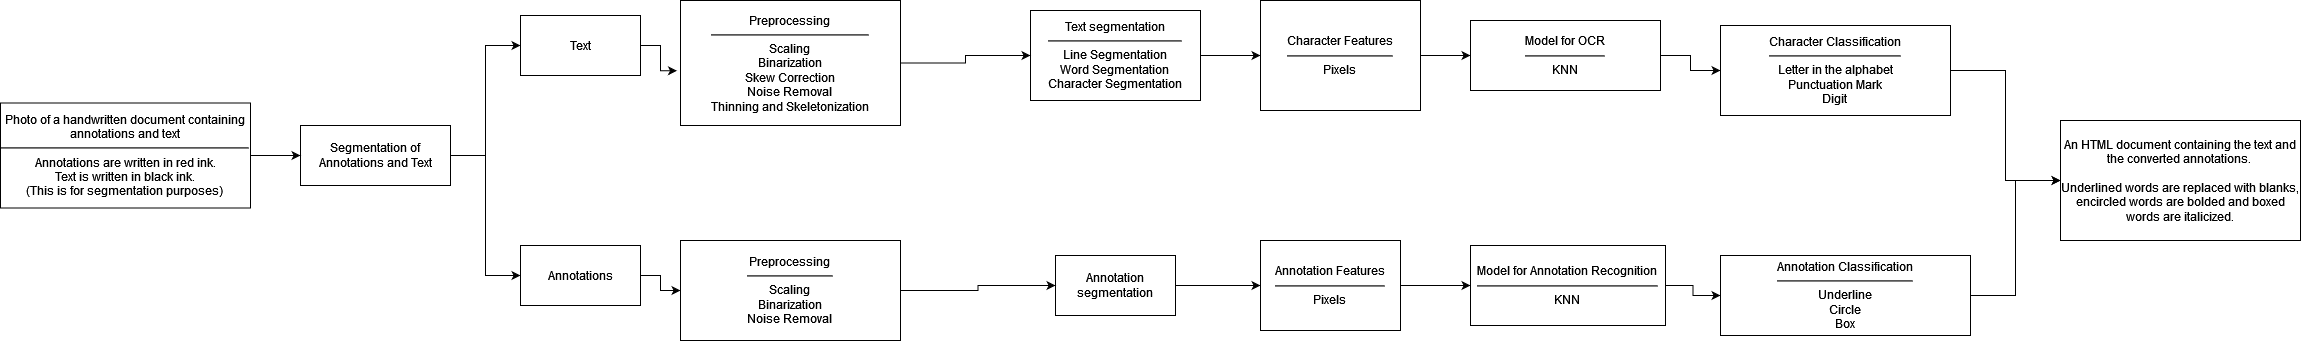

In [68]:
with Image.open("../media/method.png") as method_img:
    display(method_img)
    
    

# The image below is not updated. Will update soon.
 


## Load Data

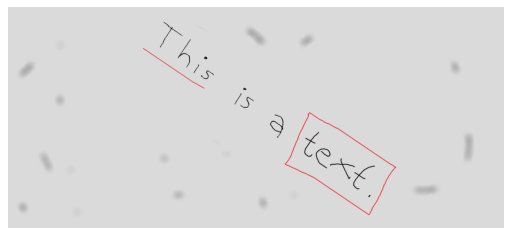

In [81]:
# load dataset here



# load test data here
test_img = cv2.imread("../input/test_3.png")
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
test_img_hsv = cv2.cvtColor(test_img, cv2.COLOR_BGR2HSV)


utils.plot_img_rgb(test_img_rgb, "")

## Binarization and Segmentation of Annotations and Text

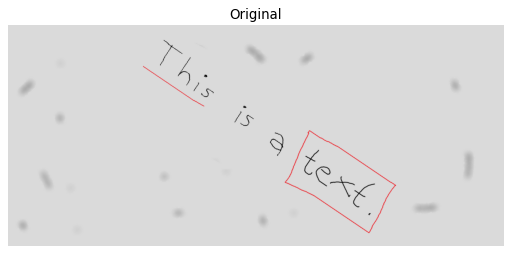

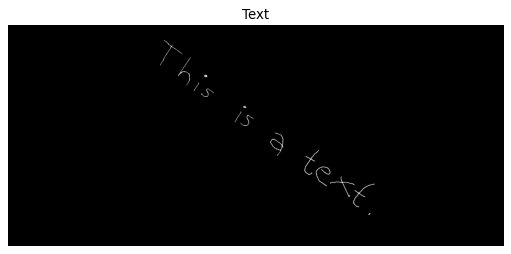

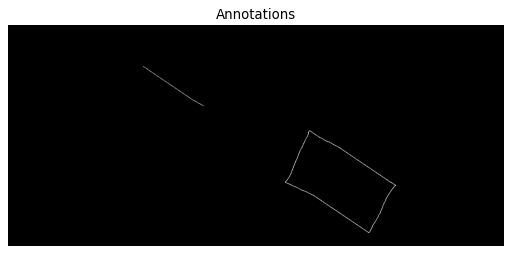

In [82]:
# Reference:
# https://docs.opencv.org/4.x/df/d9d/tutorial_py_colorspaces.html


def segment_text_annotations(img):
    # filter all black inks
    lower_text_color = np.array([0, 0, 0])
    upper_text_color = np.array([179, 60, 60])
    text_img = cv2.inRange(img, lower_text_color, upper_text_color)
    
    # filter all red inks
    lower_annotations_color = np.array([10, 170, 170])
    upper_annotations_color = np.array([179, 255, 255])
    annotations_img = cv2.inRange(img, lower_annotations_color, upper_annotations_color)
    
    return text_img, annotations_img

text_img_gs, annotations_img_gs = segment_text_annotations(test_img_hsv)
text_img_rgb = cv2.cvtColor(text_img_gs, cv2.COLOR_GRAY2RGB)
annotations_img_rgb = cv2.cvtColor(annotations_img_gs, cv2.COLOR_GRAY2RGB)


utils.plot_img_rgb(test_img_rgb, "Original")
utils.plot_img_rgb(text_img_rgb, "Text")
utils.plot_img_rgb(annotations_img_rgb, "Annotations")


## Skew Correction

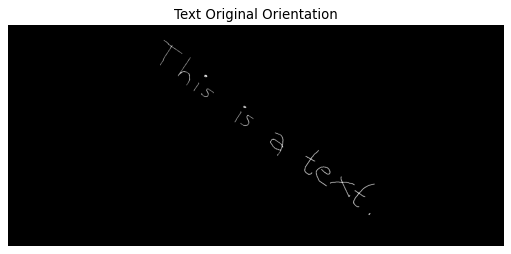

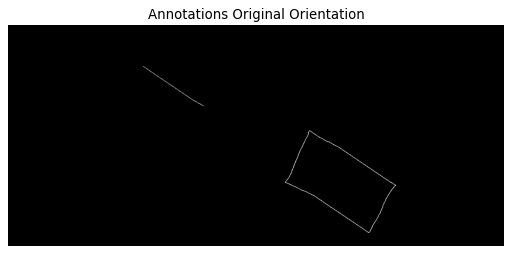

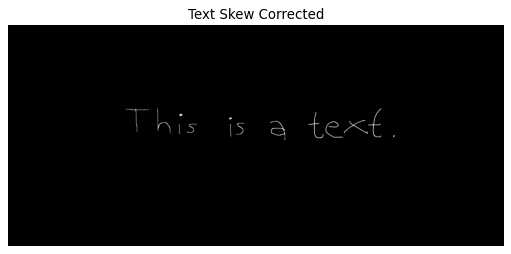

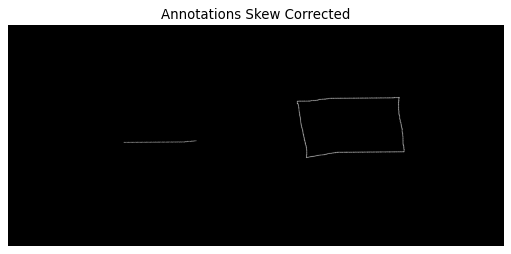

In [83]:
# References:
# https://pyimagesearch.com/2017/02/20/text-skew-correction-opencv-python/
# https://docs.opencv.org/4.x/da/d6e/tutorial_py_geometric_transformations.html

utils.plot_img_rgb(cv2.cvtColor(text_img_gs, cv2.COLOR_GRAY2RGB), "Text Original Orientation")
utils.plot_img_rgb(cv2.cvtColor(annotations_img_gs, cv2.COLOR_GRAY2RGB), "Annotations Original Orientation")

coords = np.column_stack(np.where(text_img_gs > 0))
angle = 90 - cv2.minAreaRect(coords)[-1]

rows, cols = text_img_gs.shape
rotation = cv2.getRotationMatrix2D((cols//2, rows//2), angle, 1)
text_img = cv2.warpAffine(text_img_gs, rotation, (cols, rows))
annotations_img = cv2.warpAffine(annotations_img_gs, rotation, (cols, rows))



utils.plot_img_rgb(cv2.cvtColor(text_img, cv2.COLOR_GRAY2RGB), "Text Skew Corrected")
utils.plot_img_rgb(cv2.cvtColor(annotations_img, cv2.COLOR_GRAY2RGB), "Annotations Skew Corrected")

## Text Segmentation

## Annotations Segmentation